In [2]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
import pandas as pd
from sympy import *

# Problem 2.54
Find the ground state energy of the harmonic oscillator, to five significant digits, by the "wag-the-dog" method. That is, solve Equation 2.72 numerically, varying *K* until you get a wave function that goes to zero at large $$\xi$$.  In Mathematica, appropriate input code would be

**Plot[Evaluate[u]/.[NDSolve[{u"[x]-(X^2 - K)*u[x]==0, u[0] == 1, u'[0] == 0}, u[x], {x, 10^-8, 10}, MaxSteps -> 10000]], {x, a, b}, PlotRange -> {c, d}];**

(Here (a, b) is the horizontal range of the graph, and (c, d) is the vertical range start with a = 0, b = 10, c = -10, d = 10) We know that the correct solution is K = 1, so you might start with a "guess" of K = 0.9. Notice what the "tail" of the wave function does. Now try K = 1.1, and note that the tail flips over. Somewhere in between those values lies the correct solution. Zero in on it by bracketing K tighter and tighter. As you do so, you may want to adjust a, b, c, and d, to zero in on the cross-over point.

In [3]:
def derivative(f,a,method='central',h=0.01):
    '''Compute the difference formula for f'(a) with step size h.

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a : number
        Compute derivative at x = a
    method : string
        Difference formula: 'forward', 'backward' or 'central'
    h : number
        Step size in difference formula

    Returns
    -------
    float
        Difference formula:
            central: f(a+h) - f(a-h))/2h
            forward: f(a+h) - f(a))/h
            backward: f(a) - f(a-h))/h            
    '''
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

### Answere:
$$\Psi^{"}(x) - (x^2 - K)\Psi(x) = 0$$
is

In [4]:
x = Symbol('x')
f_x_p = exp(-x**(2)).diff(x).diff(x)
f_p = lambda x :f_x_P
f_x_p

4*x**2*exp(-x**2) - 2*exp(-x**2)

In [5]:
def harmonic_osilator(i, k):
#     f_x_p = f_x.diff(x).diff(x)
#     f_p 
    return (4*((i)**2)*(np.exp(-((i)**2)))) - (2*np.exp(-((i)**2))) - ((((i)**2) - k)*np.exp(-((i)**2)))

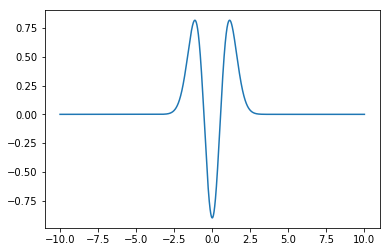

In [6]:
x = np.arange(-10, 10, .002)
# x = np.arange(-10, 10)
y = harmonic_osilator(1.5, 1.1)
y = [harmonic_osilator(i, 1.1) for i in list(x)]
# y
plt.plot(x, y)
plt.show()

In [7]:
start = harmonic_osilator(-10, .9)
x_i = -10
k_i = .9
for k in np.arange(.9, 1.1, .01):
    for i in x:
        n = harmonic_osilator(i, k)
        if(abs(n) < abs(start)):
            start = abs(n)
            x_i = i
            k_i = k
    

In [8]:
print(x_i, k_i)

-10 0.9


In [9]:
harmonic_osilator(-10, .9)

1.1119307092326281e-41

In [12]:
harmonic_osilator(-10, 0)

1.1085826408542094e-41